In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.shape

(200, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.describe(include = 'all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [7]:
data_ = data.drop(['CustomerID'], axis = 1)
data_.head(3)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6


In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_['Gender'] = le.fit_transform(data_['Gender'])

# data_['Gender'] = data_['Gender'].map({'Male':1, 'Female': 0})  
# The mapping would also work in our case 

In [9]:
data_['Gender'].unique()

array([1, 0])

In [10]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

In [11]:
data_df = pd.DataFrame(data_scaled, columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
data_df['Gender'] = data_['Gender']

In [12]:
data_df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,-1.424569,-1.738999,-0.434801,1
1,-1.281035,-1.738999,1.195704,1
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,0


In [13]:
kmeans = KMeans(4)

id_clusters = kmeans.fit_predict(data_df)
id_clusters

array([3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3,
       3, 2, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2,
       2, 3, 0, 3, 3, 3, 2, 2, 2, 2, 3, 0, 1, 1, 0, 1, 0, 1, 2, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [14]:
wcss = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_df)
    wcss.append(kmeans.inertia_)

wcss

[649.28,
 438.52241155677757,
 344.6849402132781,
 254.28290726083475,
 216.7849015165104,
 181.9514362434146,
 167.82134357397925,
 150.6647465549277,
 138.8627964019021]

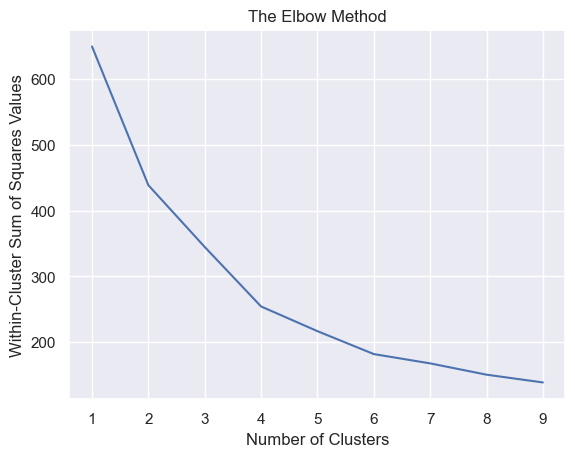

In [15]:
plt.plot(range(1,10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares Values')
plt.show()

In [16]:
sil_scores = []

for i in range(2,10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_df)
    sil_scores.append(silhouette_score(data_df, kmeans.labels_))

sil_scores

[0.3031976564160757,
 0.31503514208145234,
 0.3502702043465398,
 0.34977050035201074,
 0.356485834425401,
 0.343309990954445,
 0.330422419595931,
 0.33996050475966766]

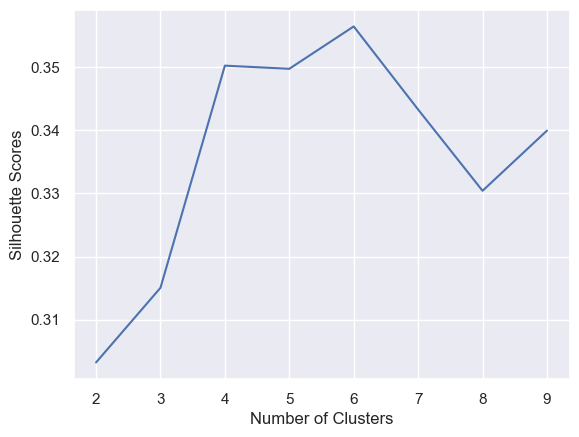

In [17]:
plt.plot(range(2,10), sil_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Scores')
plt.show()

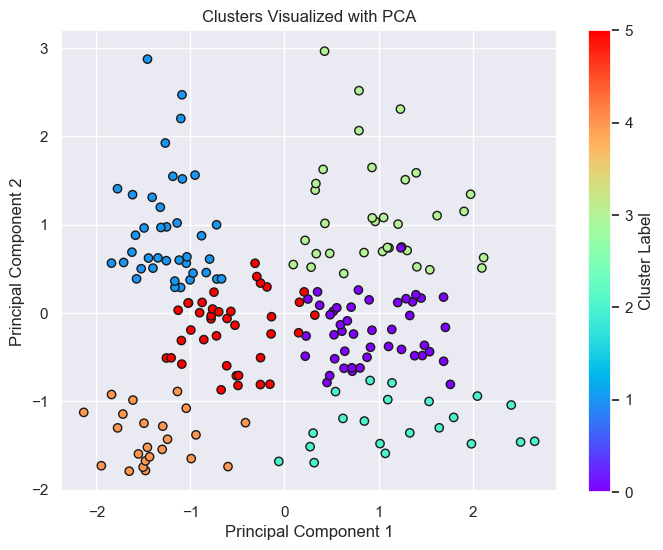

In [25]:
pca = PCA(n_components = 2)
data_pca = pca.fit_transform(data_df)

kmeans = KMeans(n_clusters = 6, random_state = 42)
kmeans.fit(data_df)
labels = kmeans.labels_

plt.figure(figsize = (8,6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap = 'rainbow', marker = 'o', edgecolor = 'k')
plt.title('Clusters Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label = 'Cluster Label')
plt.show()

In [26]:
data_with_clusters = data_.copy()
data_with_clusters['Cluster'] = kmeans.labels_

cl_summary = data_with_clusters.groupby('Cluster').mean()

print(cl_summary)

           Gender        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                 
0        0.422222  56.333333           54.266667               49.066667
1        0.461538  32.692308           86.538462               82.128205
2        0.380952  45.523810           26.285714               19.380952
3        0.588235  41.264706           88.500000               16.764706
4        0.434783  25.000000           25.260870               77.608696
5        0.342105  27.000000           56.657895               49.131579
